In [125]:
import pandas as pd
import numpy as np
import sklearn
data=pd.read_csv("stress.csv")

In [126]:
data.head(10)


,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181.0,1.0,0.8,1.521614e+09,5.0,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1.0,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606.0,0.0,1.0,1.527010e+09,4.0,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2.0,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816.0,1.0,0.8,1.535936e+09,2.0,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0.0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239.0,1.0,0.6,1.516430e+09,0.0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5.0,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421.0,1.0,0.8,1.539809e+09,24.0,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1.0,7.910952,-0.204167
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,17554.0,1.0,1.0,1.517274e+09,2.0,3.531124,...,1.000,1.1818,1.0,1.70415,1.44396,1.82046,0.75,5.0,4.338429,-0.550000
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,165.0,0.0,0.8,1.512854e+09,6.0,8.331463,...,1.000,1.1250,1.0,1.66985,1.57757,1.89926,0.88,29.0,8.394244,0.277381
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,33053.0,1.0,0.8,1.483582e+09,1.0,0.403679,...,1.000,1.1429,1.0,1.69549,1.44860,1.88963,1.00,0.0,1.028654,-0.079630
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,7581.0,1.0,0.6,1.514844e+09,134.0,5.381111,...,1.000,1.0000,1.0,1.73571,1.71471,1.93607,0.94,43.0,5.991049,-0.272917
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1517.0,1.0,1.0,1.490428e+09,20.0,1.562351,...,1.000,1.1250,1.0,1.74956,1.67353,1.89320,0.80,6.0,2.851935,-0.117262


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Columns: 116 entries, subreddit to sentiment
dtypes: float64(112), object(4)
memory usage: 2.5+ MB


In [128]:
data

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181.0,1.0,0.800000,1.521614e+09,5.0,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1.0,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606.0,0.0,1.000000,1.527010e+09,4.0,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2.0,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816.0,1.0,0.800000,1.535936e+09,2.0,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0.0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239.0,1.0,0.600000,1.516430e+09,0.0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5.0,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421.0,1.0,0.800000,1.539809e+09,24.0,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1.0,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133.0,1.0,1.000000,1.539827e+09,33.0,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6.0,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442.0,0.0,1.000000,1.539269e+09,2.0,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1.0,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834.0,0.0,0.571429,1.488938e+09,4.0,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7.0,4.036765,0.159722
2837,ptsd,5y25cl,"[0, 5]",I was talking to my mom this morning and she s...,961.0,1.0,0.571429,1.488910e+09,2.0,0.835254,...,1.0000,1.0000,1.0,1.68891,1.44615,1.89707,0.76,2.0,2.412000,0.016667


In [129]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
from nltk.corpus import stopwords

In [131]:
import string

In [132]:
stopword=set(stopwords.words('english'))

In [133]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\KIIT\AppData\Local\Temp\ipykernel_18464\567341162.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_18464\567341162.py:4: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_18464\567341162.py:8: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [134]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

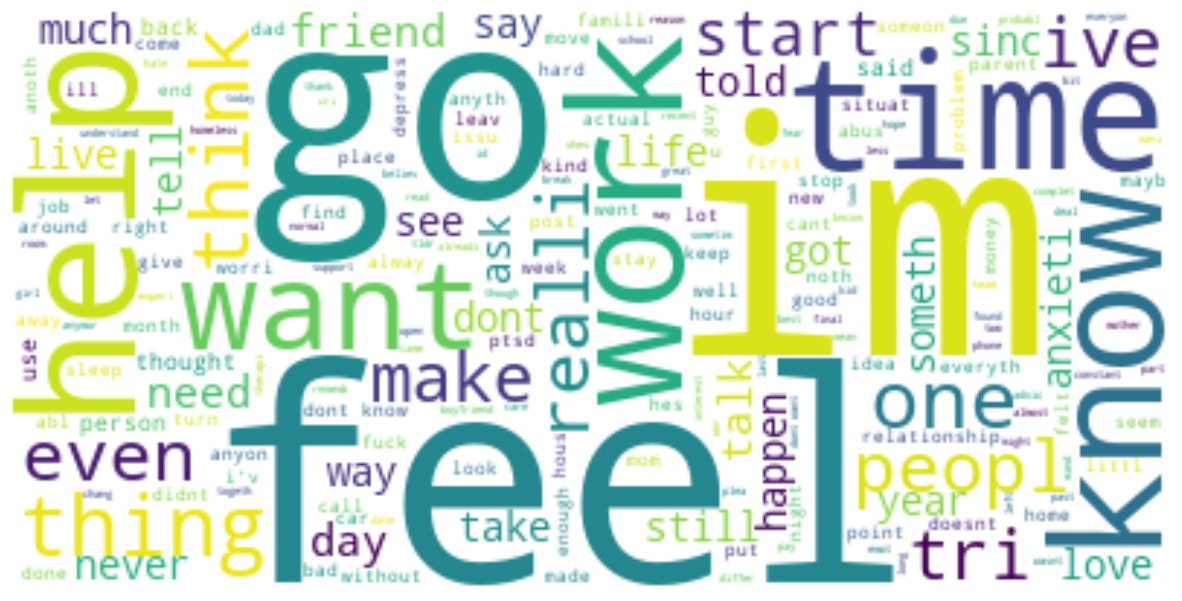

In [135]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [136]:
data["label"]=data["label"].map({0:"No Stress",1:"Stress"})

In [137]:
data=data[["text","label"]]

In [138]:
data

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress
...,...,...
2834,dont abil cope anymor im tri lot thing trigger...,Stress
2835,case first time your read post look peopl will...,No Stress
2836,find normal good relationship main problem see...,No Stress
2837,talk mom morn said sister trauma wors mine did...,Stress


In [139]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [140]:
x=np.array(data["text"])
y=np.array(data["label"])

In [141]:
cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [142]:
from sklearn.naive_bayes import BernoulliNB

In [143]:
model = BernoulliNB()

In [144]:
model.fit(xtrain,ytrain)

BernoulliNB()

In [145]:
user = input("Text")

In [146]:
data=cv.transform([user]).toarray()

In [147]:
output=model.predict(data)

In [148]:
output

array(['No Stress'], dtype='<U9')